Running Through EAZY Py and producing fitting templates to a given ZFouRGE catalogue

In [88]:

%matplotlib inline

import os
import matplotlib.pyplot as plt
import warnings
import numpy as np
from astropy.utils.exceptions import AstropyWarning
import eazy.hdf5
import time
import importlib
import sys
import eazy

np.seterr(all='ignore')
warnings.simplefilter('ignore', category=AstropyWarning)
print('EAZYCODE = '+ str(os.getenv('EAZYCODE')) + '\n')

print(time.ctime() + '\n')

print(sys.version + '\n')

for module in ['numpy', 'scipy', 'matplotlib','astropy','eazy']:
    mod = importlib.import_module(module)
    print('{0:>20} : {1}'.format(module, mod.__version__))

EAZYCODE = None

Mon Apr  8 15:43:09 2024

3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]

               numpy : 1.22.3
               scipy : 1.7.3
          matplotlib : 3.8.0
             astropy : 5.3.4
                eazy : 0.6.8


Loading the ZFOURGE catalogue locally and running it through EAZY

In [89]:
# Load any templates from the AGN template library
os.getcwd()

temp_param = 'templates/eazy_v1.3.spectra.param' # basic parameter file, no agn templates
last_id = 9 # last id in the parameter file
agn_param = 'templates/eazy_v1.3_AGN.param' # parameter file with agn templates

with open(temp_param) as f:
    original = f.read()

agn_dir = 'templates/hlsp_agnsedatlas_observed/' # dir with all agn templates
agn_temp_all = os.listdir(agn_dir)
def agn_template_loader(templates):
    copy = original
    no_of_templates = len(templates)
    if no_of_templates == 0:
        print('No AGN templates added')
        return
    for i in range(no_of_templates):
        id = last_id + i
        copy = copy + f'\n{id}   {agn_dir}{agn_temp_all[templates[i]]}   1.0 0 1.0    '

    open(agn_param, 'w').write(copy)
    print(f'AGN templates added to the parameter file {agn_param}')

In [103]:
# Loading ZFOURGE catalogue from local drive

field = 'cdfs' #'cdfs', 'cosmos', or 'uds'
version = {'cdfs': '.v1.6.11',
           'cosmos': '.v1.3.8',
           'uds': '.v1.6.11'}
# following files should be in the same dir as the project
param_file = f'base.param' #base parameter file, does not include all information
translate_file = f'{field}.translate'

agn_sed = [] # AGN templates to be added
agn_template_loader(agn_sed) # loads the chosen AGN templates to the parameter file

params = {} # setting field specific parameters
params['TEMPLATES_FILE'] = 'templates/eazy_v1.3_AGN.param'
params['CACHE_FILE'] = f'zfourge/{field}/{field}.tempfilt'
params['CATALOG_FILE'] = f'zfourge/{field}/{field}{version[field]}.cat'
params['MAIN_OUTPUT_FILE'] = f'outputs/{field}/{field}'


AGN templates added to the parameter file templates/eazy_v1.3_AGN.param


In [104]:
# Run EAZY with parameters

self = eazy.photoz.PhotoZ(param_file=param_file, translate_file=translate_file, zeropoint_file=None,
                         params=params, load_prior=True, load_products=False)

Read default param file: base.param
Read CATALOG_FILE: zfourge/cdfs/cdfs.v1.6.11.cat
   >>> NOBJ = 30911
f_IRAC_80 e_IRAC_80 ( 21): IRAC/irac_tr4_2004-08-09.dat
f_IRAC_58 e_IRAC_58 ( 20): IRAC/irac_tr3_2004-08-09.dat
f_IRAC_45 e_IRAC_45 ( 19): IRAC/irac_tr2_2004-08-09.dat
f_IRAC_36 e_IRAC_36 ( 18): IRAC/irac_tr1_2004-08-09.dat
f_Ks e_Ks (255): FOURSTAR/Ks_cam_optics_sky.txt
f_KsHI e_KsHI (269): VLT/hawki_k_ETC.dat
f_J1 e_J1 (249): FOURSTAR/J1_cam_optics_sky.txt
f_J2 e_J2 (250): FOURSTAR/J2_cam_optics_sky.txt
f_J3 e_J3 (251): FOURSTAR/J3_cam_optics_sky.txt
f_Hs e_Hs (254): FOURSTAR/Hshort_cam_optics_sky.txt
f_Hl e_Hl (253): FOURSTAR/Hlong_cam_optics_sky.txt
f_U e_U (103): ESO/vimos_u.res
f_B e_B (  1): hst/ACS_update_sep07/wfc_f435w_t77.dat
f_V e_V (  4): hst/ACS_update_sep07/wfc_f606w_t77.dat
f_R e_R (260): ESO/VIMOS/R.dat
f_I e_I (  5): hst/ACS_update_sep07/wfc_f775w_t77.dat
f_Z e_Z (  7): hst/ACS_update_sep07/wfc_f850lp_t77.dat
f_F125W e_F125W (203): hst/wfc3/IR/f125w.dat
f_F140W e_F

100%|██████████| 9/9 [00:14<00:00,  1.59s/it]


Template   0: eazy_v1.1_sed1.dat (NZ=1).
Template   1: eazy_v1.1_sed2.dat (NZ=1).
Template   2: eazy_v1.1_sed3.dat (NZ=1).
Template   3: eazy_v1.1_sed4.dat (NZ=1).
Template   4: eazy_v1.1_sed5.dat (NZ=1).
Template   5: eazy_v1.1_sed6.dat (NZ=1).
Template   6: eazy_v1.1_sed7.dat (NZ=1).
Template   7: c09_del_8.6_z_0.019_chab_age09.40_av2.0.dat (NZ=1).
Template   8: erb2010_highEW.dat (NZ=1).
Process templates: 15.267 s


48it [00:01, 35.97it/s]


Iteration:  0


100%|██████████| 48/48 [00:23<00:00,  2.01it/s]


Compute best fits
fit_best: 5.5 s (n_proc=2,  NOBJ=29286)
Fit 29.8 s (n_proc=8, NOBJ=29669)
Iterative correction - zeropoint / template
Iteration:  1


100%|██████████| 48/48 [00:23<00:00,  2.01it/s]


Compute best fits
fit_best: 5.5 s (n_proc=2,  NOBJ=29306)
Fit 29.9 s (n_proc=8, NOBJ=29669)
Iterative correction - zeropoint / template
Iteration:  2


100%|██████████| 48/48 [00:24<00:00,  1.99it/s]


Compute best fits
fit_best: 5.5 s (n_proc=2,  NOBJ=29317)
Fit 30.1 s (n_proc=8, NOBJ=29669)
Iterative correction - zeropoint / template


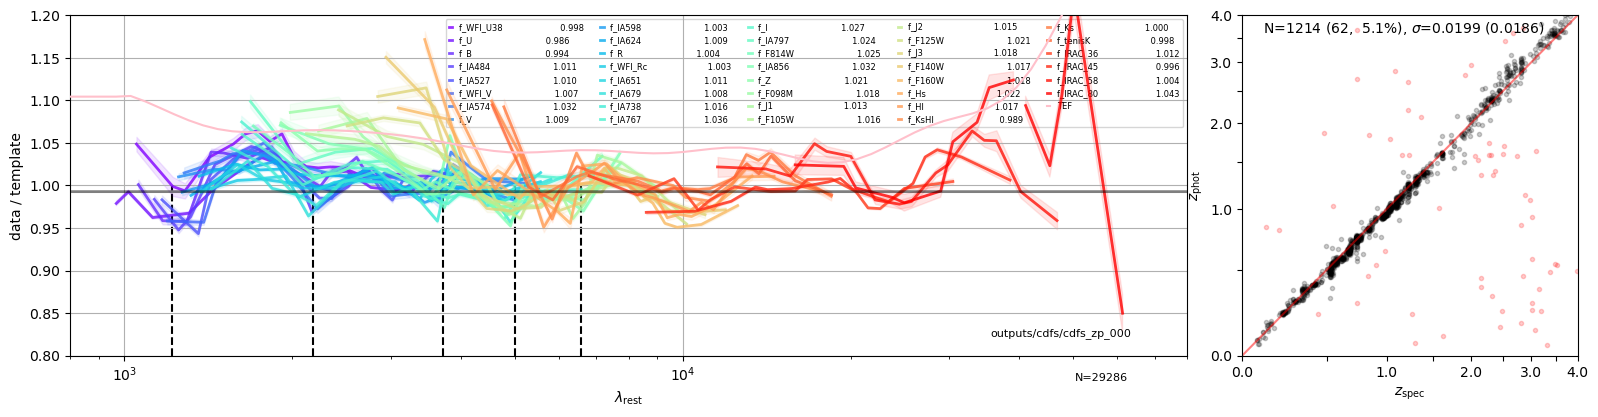

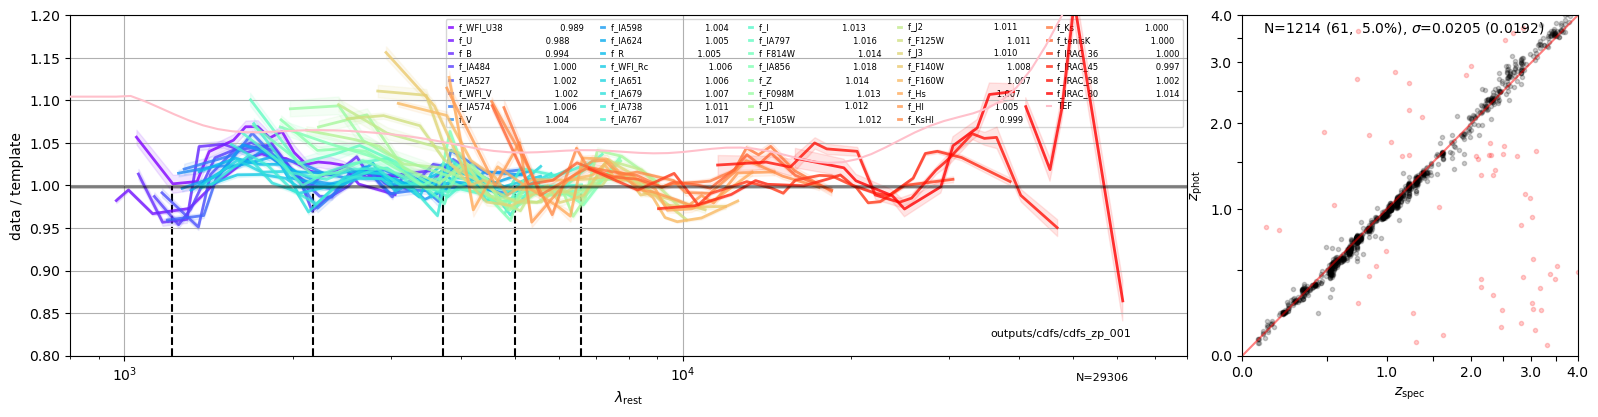

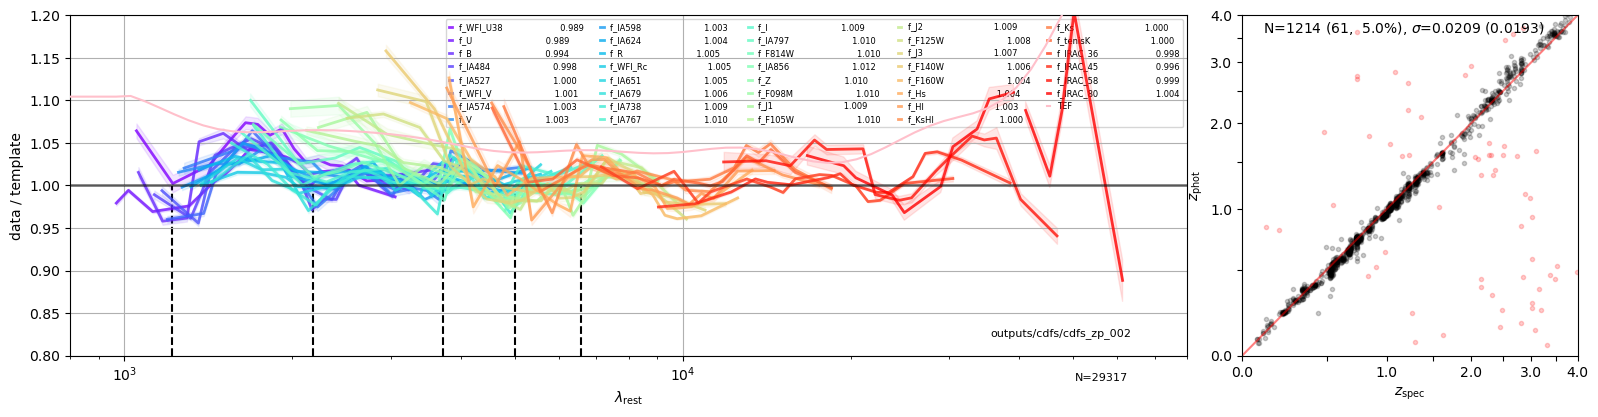

In [105]:
# Iterative Zero-point corrections

NITER = 3 # no. of iterations
NBIN = np.minimum(self.NOBJ//100, 180) # no. of bins

for iter in range(NITER):
    print('Iteration: ', iter)

    sn = self.fnu/self.efnu
    clip = (sn > 1).sum(axis=1) > 4 # Generally make this higher to ensure reasonable fits
    self.iterate_zp_templates(idx=self.idx[clip], update_templates=False,
                              update_zeropoints=True, iter=iter, n_proc=8,
                              save_templates=False, error_residuals=False,
                              NBIN=NBIN, get_spatial_offset=False)

Set sys_err = 0.03 (positive=True)


100%|██████████| 48/48 [00:24<00:00,  1.93it/s]


Compute best fits
fit_best: 4.9 s (n_proc=3,  NOBJ=30402)
Fit 30.2 s (n_proc=8, NOBJ=30911)


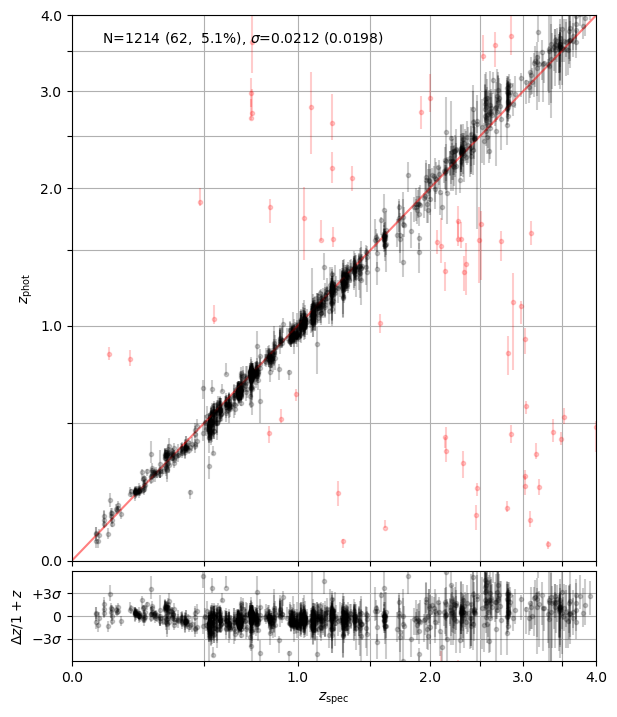

In [106]:
# Turn off error corrections derived above
self.set_sys_err(positive=True)

# Full catalog
sample = np.isfinite(self.ZSPEC)

# fit_parallel renamed to fit_catalog 14 May 2021
self.fit_catalog(self.idx[sample], n_proc=8)

# Show zspec-zphot comparison
fig = self.zphot_zspec()

In [94]:
 # Derived parameters (z params, RF colors, masses, SFR, etc.)
warnings.simplefilter('ignore', category=RuntimeWarning)
zout, hdu = self.standard_output(simple=False,
                                 rf_pad_width=0.5, rf_max_err=2,
                                 prior=True, beta_prior=True,
                                 absmag_filters=[],
                                 extra_rf_filters=[])
# zout is also saved to the designated zout file in the parameter file

Get best fit coeffs & best redshifts
fit_best: 15.3 s (n_proc=3,  NOBJ=30532)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


 23%|██▎       | 7017/30532 [01:20<04:29, 87.10it/s] 


KeyboardInterrupt: 

In [ ]:
# Show UVJ diagram
uv = -2.5*np.log10(zout['restU']/zout['restV'])
vj = -2.5*np.log10(zout['restV']/zout['restJ'])
ssfr = zout['sfr']/zout['mass']

sel = (zout['z_phot'] > 0.2) & (zout['z_phot'] < 1)
plt.scatter(vj[sel], uv[sel], c=np.log10(ssfr)[sel],
            vmin=-13, vmax=-8, alpha=0.5, cmap='RdYlBu')

plt.xlim(-0.2, 2.3); plt.ylim(0, 2.4); plt.grid()
plt.xlabel(r'$(V-J)_0$'); plt.ylabel(r'$(U-V)_0$')

In [ ]:
# Show brightest objects with z_spec > 1

ifilter = self.flux_columns[np.argmin((self.lc - 8140)**2)]

imag = 25 - 2.5*np.log10(self.cat[ifilter])
sel = (self.ZSPEC > 1.1)

so = np.argsort(imag[sel])
ids = self.OBJID[sel][so]

for i in range(4):
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3], show_components=True,
                              logpz=True, zr=[0,4])

In [ ]:
# Compare forced fit at z_spec
for i in range(4):
    ix = np.where(self.OBJID == ids[i])[0][0]
    fig, data = self.show_fit(ids[i], xlim=[0.2, 3],
                        show_components=False,
                        template_color='steelblue', logpz=True, zr=[0,4])

    # Now show with z_spec
    axes = fig.axes[:1]
    res = self.show_fit(ids[i], xlim=[0.2, 3], axes=axes,
                        zshow=self.ZSPEC[ix],
                        show_components=False,
                        template_color='r')

    axes[0].legend(loc='upper left')

In [ ]:
zout.meta

In [ ]:
zout.info()

In [ ]:
eazy.hdf5.write_hdf5(self, h5file=self.param['MAIN_OUTPUT_FILE'] + '.h5')